<h1>Exercise 4</h1>

In [18]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END, START

In [19]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    number3: int
    operation2: str
    number4: int
    finalNumber1: int
    finalNumber2: int

In [29]:
def adder(state: AgentState) -> AgentState:
    """this node adds two numbers"""
    state['finalNumber1'] = state['number1'] + state['number2']

    return state

def substractor(state: AgentState) -> AgentState:
    """this node substract two numbers"""
    state['finalNumber1'] = state['number1'] - state['number2']

    return state

def adder2(state: AgentState) -> AgentState:
    """this node adds two numbers"""
    state['finalNumber2'] = state['number3'] + state['number4']

    return state

def substractor2(state: AgentState) -> AgentState:
    """this node substract two numbers"""
    state['finalNumber2'] = state['number3'] - state['number4']

    return state

def decide_next_node(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""

    if state['operation'] == "+":
        return "addition_operation"

    if state['operation'] == "-":
        return "substraction_operation"

def decide_next_node2(state: AgentState) -> AgentState:
    """this node will select the next node of the graph"""

    if state['operation2'] == "+":
        return "addition_operation2"

    if state['operation2'] == "-":
        return "substraction_operation2"

In [34]:
graph = StateGraph(AgentState)

graph.add_node("adder", adder)
graph.add_node("substractor", substractor)
graph.add_node("router1", lambda state:state)

graph.add_node("adder2", adder2)
graph.add_node("substractor2", substractor2)
graph.add_node("router2", lambda state:state)

graph.add_edge(START, "router1")

graph.add_conditional_edges(
    "router1",
    decide_next_node,
    {
        "addition_operation": "adder",
        "substraction_operation": "substractor"    
    }
)

graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2": "adder2",
        "substraction_operation2": "substractor2"    
    }
)

graph.add_edge("adder", "router2")
graph.add_edge("substractor", "router2")

graph.add_edge("adder2", END)
graph.add_edge("substractor2", END)

app = graph.compile()

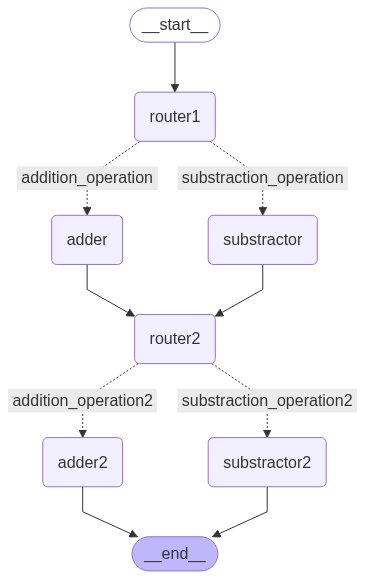

In [35]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [36]:
initial_state_one = AgentState(number1= 5, operation= "+", number2= 10, number3=20, number4=15, operation2= "-")
print(app.invoke(initial_state_one))

{'number1': 5, 'operation': '+', 'number2': 10, 'number3': 20, 'operation2': '-', 'number4': 15, 'finalNumber1': 15, 'finalNumber2': 5}
